# Quantum Randomized Benchmarking

### 参考资料

- [Randomized Benchmarking](https://qiskit.org/ecosystem/experiments/manuals/verification/randomized_benchmarking.html)

Randomized benchmarking (RB) is a popular protocol for characterizing the error rate of quantum processors.

The environment for running RB experiments can use the pip and requirement.txt to install.

In [3]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits

# For simulation
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

qubits is [0],
list_m is [  1 201 401 601],
num_samples is 10,
seed is 1010
Gate error ratio: {'x': 1.0, 'rz': 0.0, 'sx': 1.0}


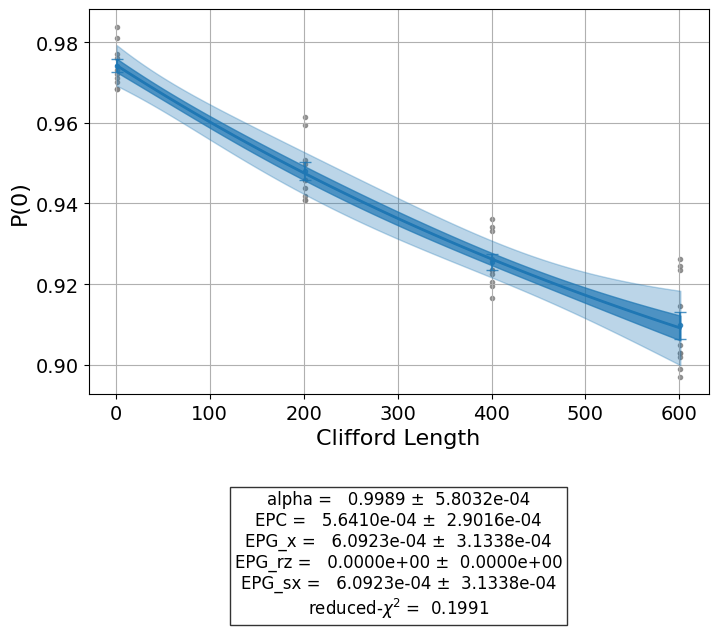

-------------------0-------------
AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 136
 - degree of freedom: 1
 - chi-square: 0.19912453689009574
 - reduced chi-square: 0.19912453689009574
 - Akaike info crit.: -6.000476790396343
 - Bayesian info crit.: -7.8415937070366715
 - init params:
  * a = 0.4742616943127298
  * alpha = 0.9997567738430103
  * b = 0.5
 - fit params:
  * a = 0.13253305919980943 ± 0.051467795415526665
  * alpha = 0.998871805224324 ± 0.0005803245269491484
  * b = 0.8418644473081925 ± 0.05193298126398399
 - correlations:
  * (a, b) = -0.9995068876690468
  * (alpha, b) = -0.9954868946502058
  * (a, alpha) = 0.9932006719835841
- quality: good
- device_components: ['Q0']
- verified: False
-------------------1-------------
AnalysisResult
- name: alpha
- value: 0.9989+/-0.0006
- χ²: 0.19912453689009574
- qua

In [60]:
#lengths 
list_m = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]
print(f"qubits is {qubits},\nlist_m is {list_m},\nnum_samples is {num_samples},\nseed is {seed}")

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, list_m, num_samples=num_samples, seed=seed)
# exp1.set_experiment_options()

expdata1 = exp1.run(backend, seed=seed).block_for_results()


# expdata1.experiment.analysis.set_options(gate_error_ratio = {'x': 0.0, 'rz': 0.0, 'sx': 1.0})
results1 = expdata1.analysis_results()
# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
display(expdata1.figure(0))
for i in range(len(results1)):
    print(f"-------------------{i}-------------")
    print(results1[i])

In [22]:
1-0.998871805224324 +(1-0.998871805224324 )/2

0.0016922921635140753

In [56]:
expdata1.experiment.analysis.options.gate_error_ratio

{'x': 1.0, 'rz': 0.0, 'sx': 1.0}

### expdata1

In [47]:
print(expdata1)

---------------------------------------------------
Experiment: StandardRB
Experiment ID: 84b0b13f-f039-4027-a3da-008a9ad24bce
Status: ExperimentStatus.DONE
Backend: AerSimulator(''aer_simulator(fake_perth)'
             noise_model=<NoiseModel on ['sx', 'reset', 'id', 'cx', 'x', 'measure']>)
Data: 40
Analysis Results: 6
Figures: 1


when m=1, we chose m+1 operators, the m operators are randomized, the m+1 is a operator to make the result state to be the indentity operation.

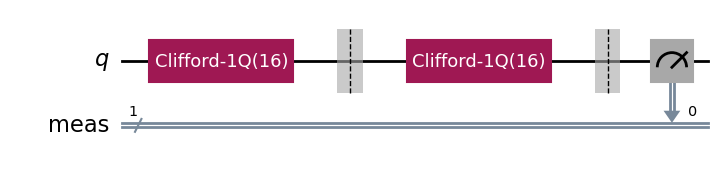

In [38]:
# m = 1 
exp1.circuits()[0].draw(output="mpl", style="iqp")

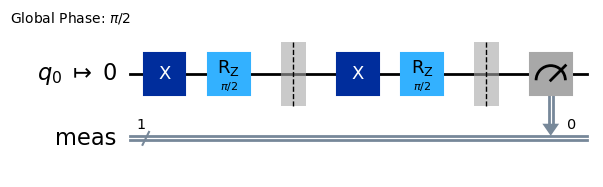

In [51]:
from qiskit import transpile
transpile(exp1.circuits()[0], backend, **vars(exp1.transpile_options)).draw(output="mpl", style="iqp", idle_wires=False)

In [11]:
lengths_2_qubit = np.arange(1, 200, 30)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (1, 2)

# Run a 1-qubit RB experiment on qubits 1, 2 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB([qubit], lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ],
    flatten_results=True,
)
expdata_1q = single_exps.run(backend).block_for_results()

Gate error ratio: {'cx': 1.0}


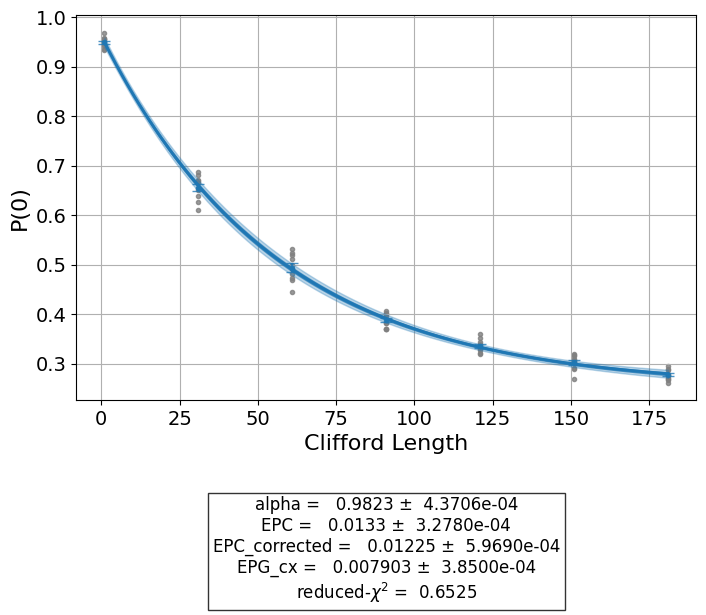

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 16
 - degree of freedom: 4
 - chi-square: 2.609926562616105
 - reduced chi-square: 0.6524816406540263
 - Akaike info crit.: -0.9061164553168028
 - Bayesian info crit.: -1.0683860081508634
 - init params:
  * a = 0.7125416723422131
  * alpha = 0.9821933027945992
  * b = 0.25
 - fit params:
  * a = 0.7101938850255133 ± 0.005228219331653092
  * alpha = 0.9822703104757462 ± 0.0004370607399945538
  * b = 0.251968192823494 ± 0.004636113232004893
 - correlations:
  * (alpha, b) = -0.8837777009516451
  * (a, b) = -0.7726865696072406
  * (a, alpha) = 0.5877448711764446
- quality: good
- device_components: ['Q1', 'Q2']
- verified: False
AnalysisResult
- name: alpha
- value: 0.9823+/-0.0004
- χ²: 0.6524816406540263
- quality: good
- device_components: ['Q1', 'Q2']
- verified: False
An

In [12]:
# Run an RB experiment on qubits 1, 2
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)

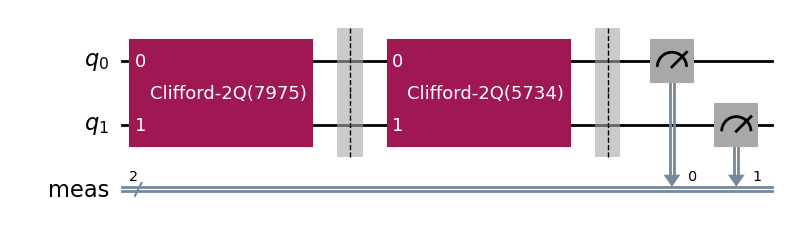

In [34]:
# m=1
exp_2q.circuits()[0].draw(output="mpl", style="iqp")

In [18]:
# exp_2q.circuits()[1].draw(output="mpl", style="iqp")

## Displaying the RB circuits

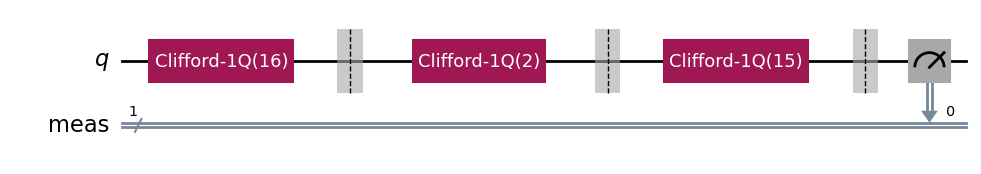

In [7]:
# Run an RB experiment on qubit 0
exp = StandardRB(physical_qubits=(0,), lengths=[2], num_samples=1, seed=seed)
c = exp.circuits()[0]
c.draw(output="mpl", style="iqp")

In [15]:
len(exp_2q.circuits())

70

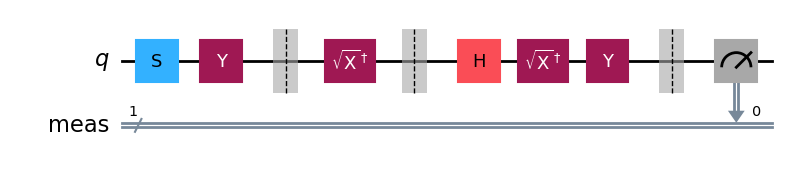

In [8]:
c.decompose().draw(output="mpl", style="iqp")

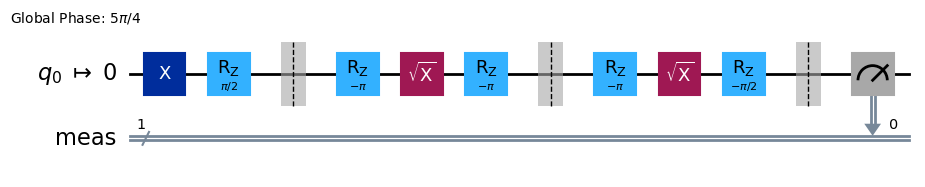

In [9]:
from qiskit import transpile
transpile(c, backend, **vars(exp.transpile_options)).draw(output="mpl", style="iqp", idle_wires=False)

## Interleaved RB experiment

In [4]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (1, 2)

# The interleaved gate is the CX gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()

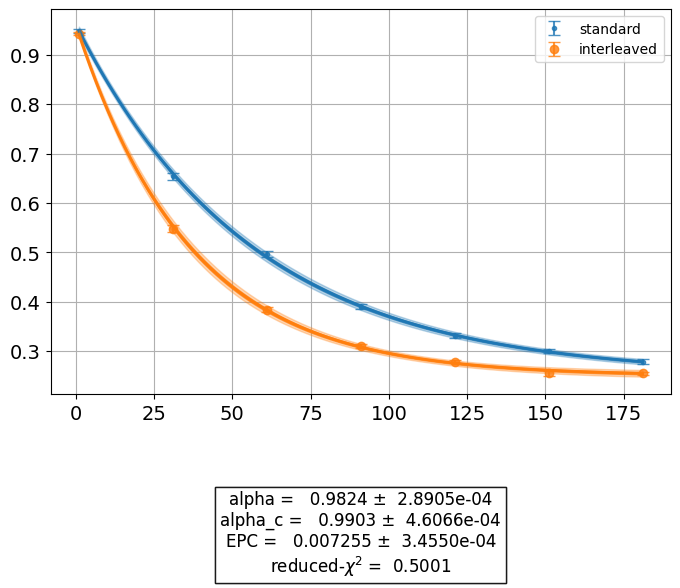

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 25
 - degree of freedom: 10
 - chi-square: 5.001003334149488
 - reduced chi-square: 0.5001003334149489
 - Akaike info crit.: -6.411862786750181
 - Bayesian info crit.: -3.855633468289147
 - init params:
  * a = 0.7114279404981769
  * alpha = 0.98245088094886
  * b = 0.25
  * alpha_c = 0.9900553024956761
 - fit params:
  * a = 0.7108985101748349 ± 0.0035896898969805867
  * alpha = 0.9823793627015164 ± 0.000289047327487112
  * b = 0.2501298065748506 ± 0.0026136293729048694
  * alpha_c = 0.9903272286536794 ± 0.0004606603964103465
 - correlations:
  * (alpha, b) = -0.6947825656197255
  * (a, b) = -0.602338851713509
  * (b, alpha_c) = -0.3883252682067295
  * (alpha, alpha_c) = -0.01656922594045573
  * (a, alpha_c) 

In [5]:
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

In [10]:
len(int_exp2.circuits())

140

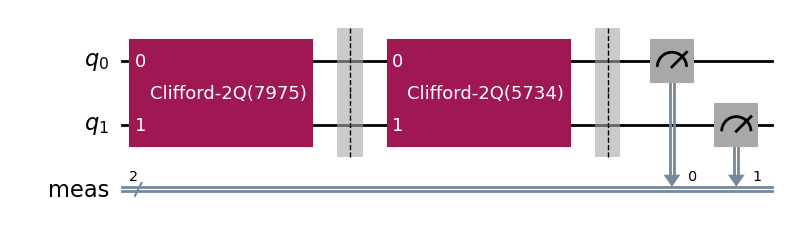

In [9]:
int_exp2.circuits()[0].draw(output="mpl", style="iqp")

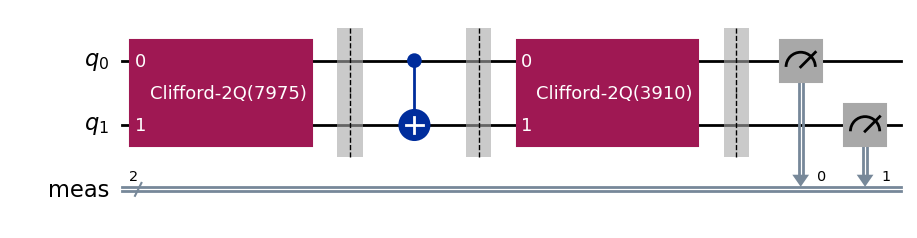

In [16]:
int_exp2.circuits()[1].draw(output="mpl", style="iqp")

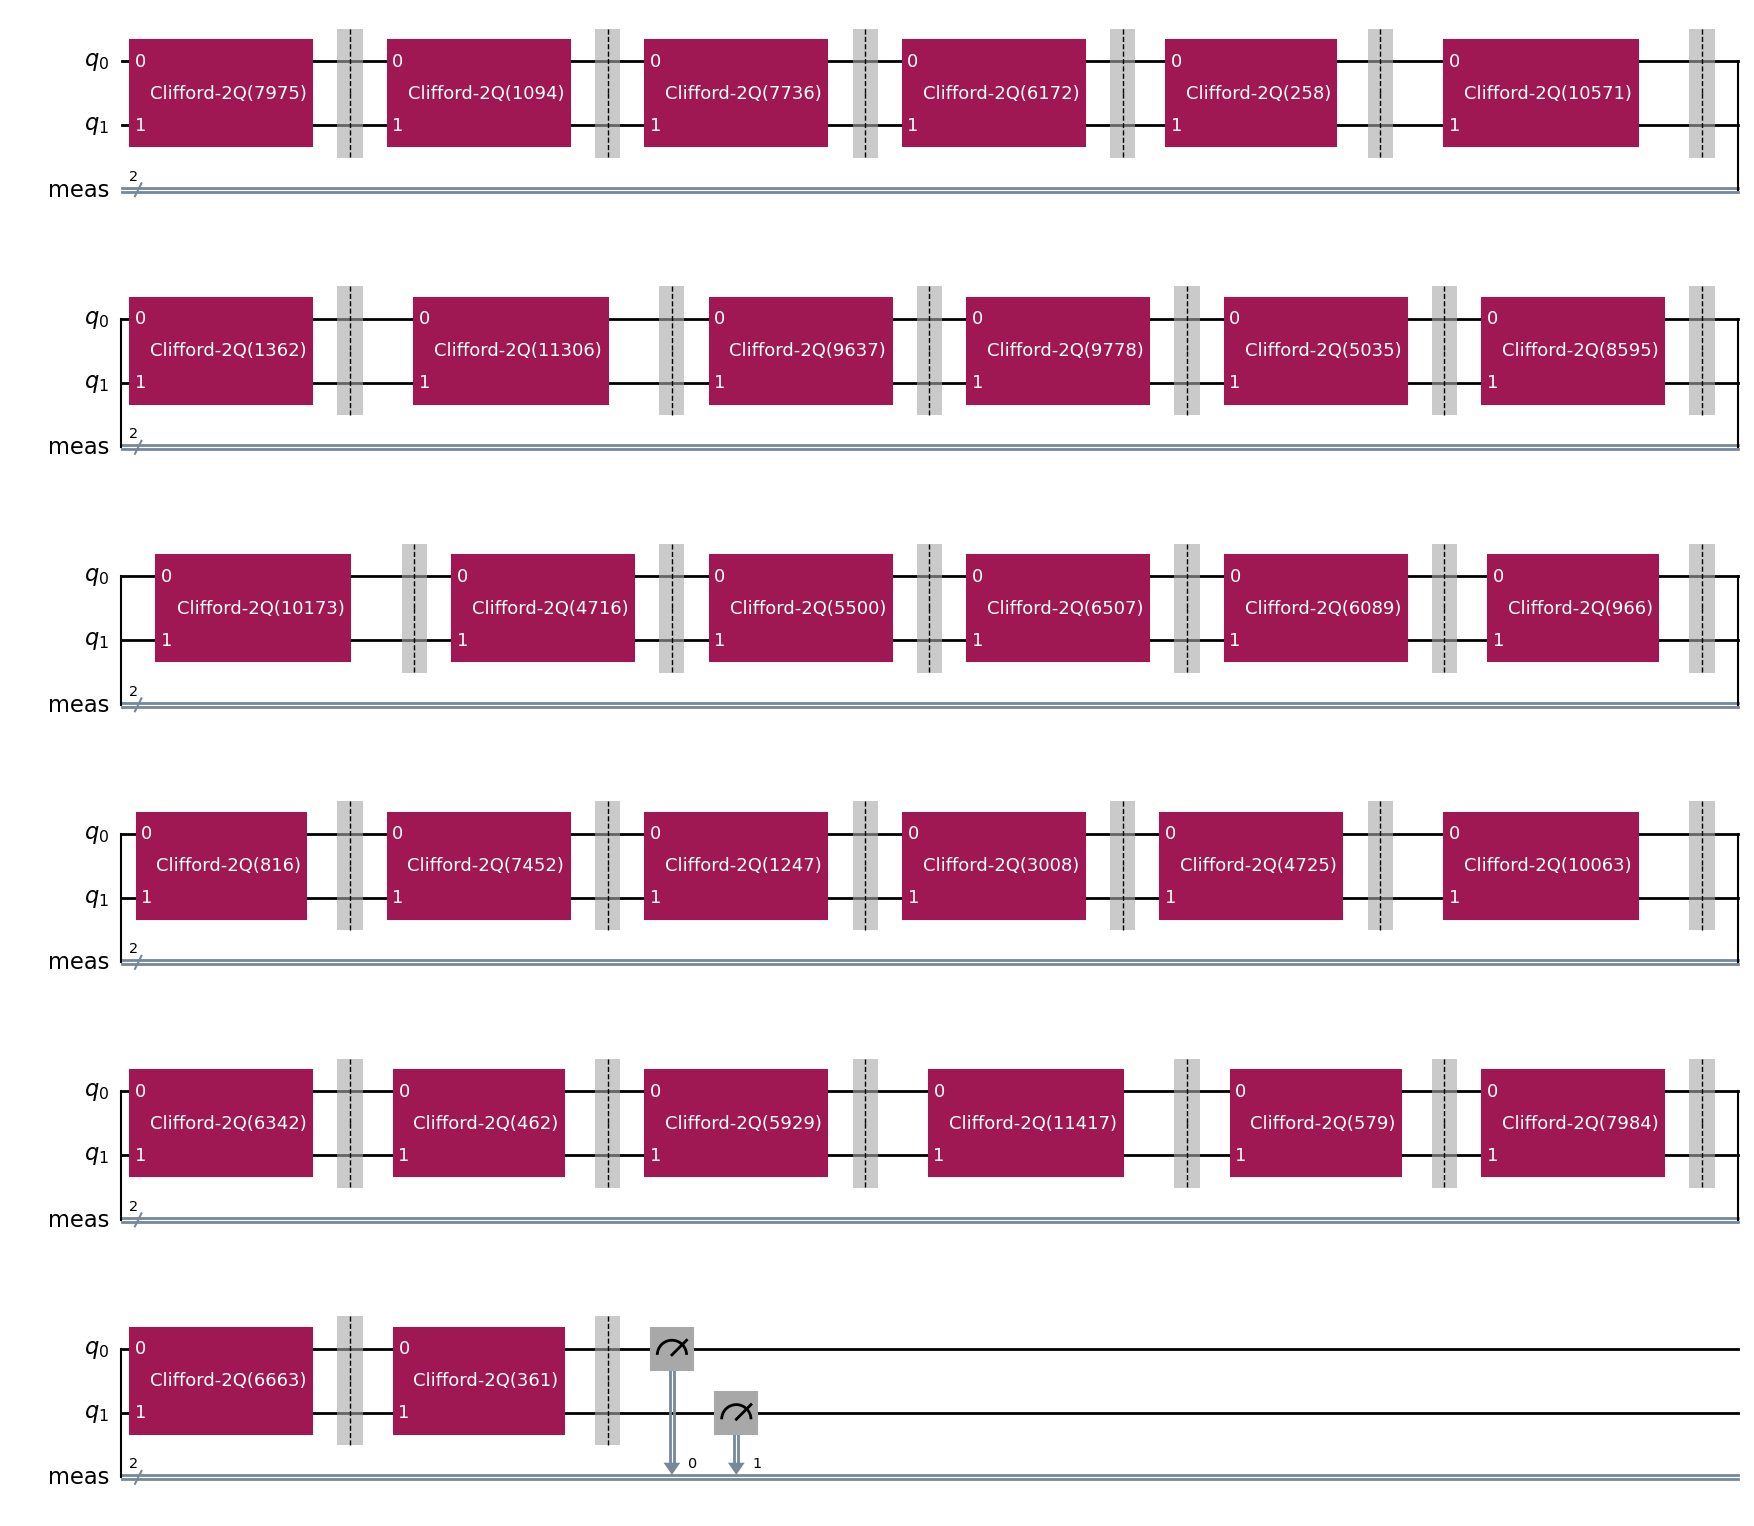

In [20]:
int_exp2.circuits()[2].draw(output="mpl", style="iqp")

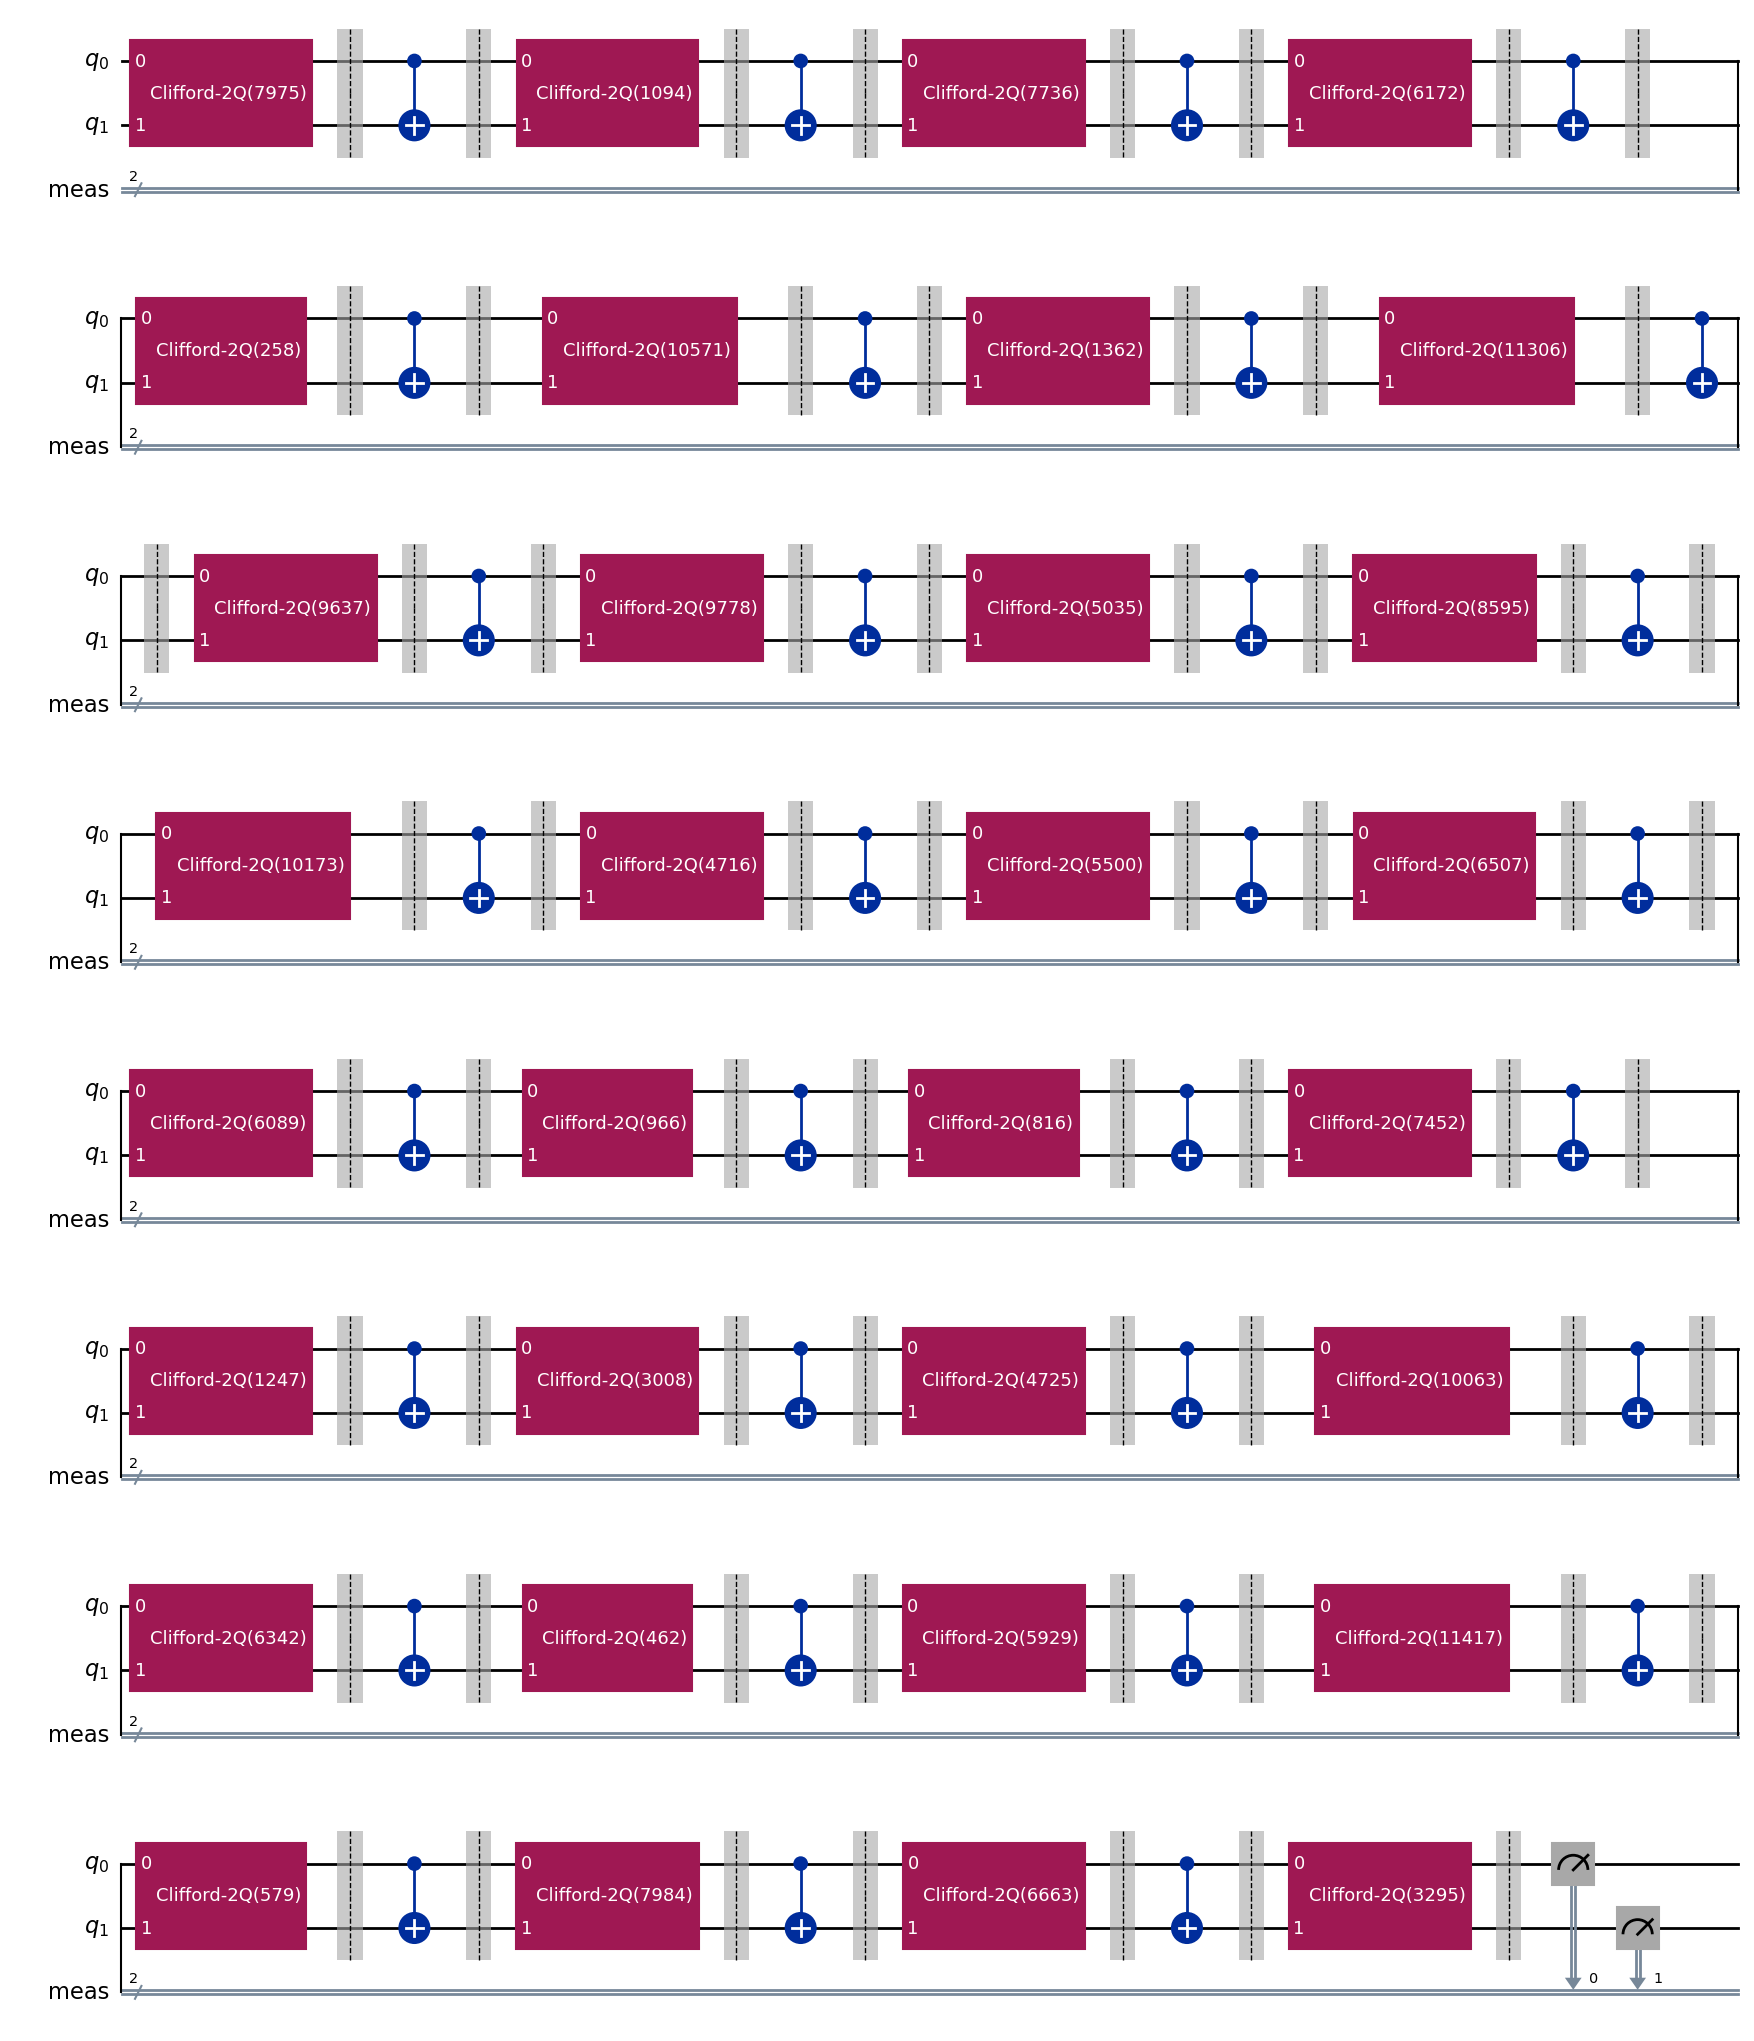

In [19]:
int_exp2.circuits()[3].draw(output="mpl", style="iqp")

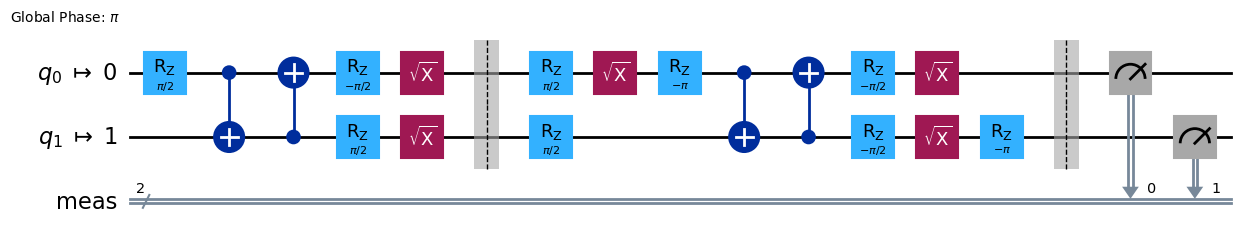

In [7]:
from qiskit import transpile
c = int_exp2.circuits()[0]
transpile(c, backend, **vars(int_exp2.transpile_options)).draw(output="mpl", style="iqp", idle_wires=False)